# Day 6-7: Exploratory Data Analysis (EDA)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.	Basic Statistics

In [4]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
print(df.describe())
print('-----------------------------------------------------------------------------------------')
print(df['FraudFound_P'].value_counts())  # Check class balance
df

        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15419.000000        15419.000000  15419.000000  15419.000000   
mean       2.788637            2.694079     40.685842      0.059861   
std        1.287611            1.259082     12.181893      0.237237   
min        1.000000            1.000000     16.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     39.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count   15419.00000  15419.000000  15419.000000  15419.000000  15419.000000  
mean     7710.90168      8.482846    407.704780      2.487840   1994.866528  
std      4451.37980      4.599798     43.952379      1.119482      0.803309  
min         1.00000      1.000000    300.000000 

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15415,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15416,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15417,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


2.	Fraud Distribution

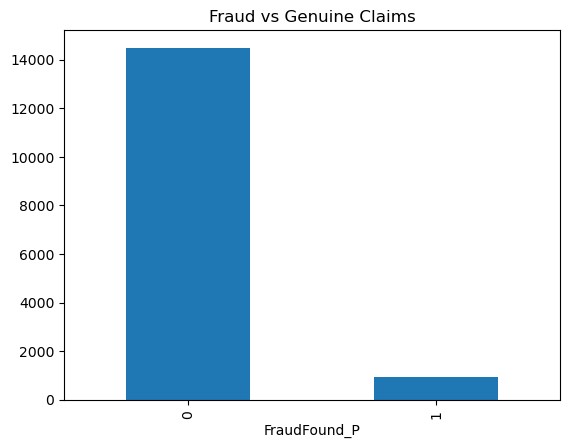

In [7]:

df['FraudFound_P'].value_counts().plot(kind='bar')
plt.title('Fraud vs Genuine Claims')
plt.show()

3.	Analyze Key Features

In [ ]:
# 1. Policy Annual Premium by Fraud
df.groupby('fraud_reported')['policy_annual_premium'].mean().plot(kind='bar', color=['green', 'red'])
plt.title('Average Policy Premium: Fraud vs Genuine')
plt.xlabel('Fraud Reported')
plt.ylabel('Average Premium ($)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 2. Age Distribution by Fraud
plt.figure(figsize=(10, 5))
df[df['fraud_reported'] == 'Y']['age'].hist(bins=20, alpha=0.5, label='Fraud', color='red')
df[df['fraud_reported'] == 'N']['age'].hist(bins=20, alpha=0.5, label='Genuine', color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution: Fraud vs Genuine')
plt.legend()
plt.show()

In [ ]:
# 3. Total Claim Amount (sum of all claim types)
df['total_claim'] = df['injury_claim'] + df['property_claim'] + df['vehicle_claim']
df.groupby('fraud_reported')['total_claim'].mean().plot(kind='bar', color=['green', 'red'])
plt.title('Average Total Claim Amount: Fraud vs Genuine')
plt.xlabel('Fraud Reported')
plt.ylabel('Average Claim ($)')
plt.show()

In [ ]:
# 4. Incident Severity Breakdown
pd.crosstab(df['incident_severity'], df['fraud_reported'], normalize='columns').plot(kind='bar')
plt.title('Incident Severity Distribution by Fraud Status')
plt.xlabel('Incident Severity')
plt.ylabel('Proportion')
plt.legend(title='Fraud Reported')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 5. Incident Type vs Fraud
pd.crosstab(df['incident_type'], df['fraud_reported']).plot(kind='bar', figsize=(10, 5))
plt.title('Incident Type: Fraud vs Genuine')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 6. Collision Type Analysis
pd.crosstab(df['collision_type'], df['fraud_reported']).plot(kind='bar')
plt.title('Collision Type: Fraud vs Genuine')
plt.xlabel('Collision Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 7. Police Report Filed
pd.crosstab(df['police_report_available'], df['fraud_reported'], normalize='columns').plot(kind='bar')
plt.title('Police Report Filed: Fraud vs Genuine')
plt.xlabel('Police Report Available')
plt.ylabel('Proportion')
plt.legend(title='Fraud Reported')
plt.show()


In [ ]:
# 8. Number of Witnesses
df.groupby('fraud_reported')['witnesses'].mean().plot(kind='bar', color=['green', 'red'])
plt.title('Average Number of Witnesses')
plt.xlabel('Fraud Reported')
plt.ylabel('Average Witnesses')
plt.show()


In [ ]:
# 9. Insured Education Level
pd.crosstab(df['insured_education_level'], df['fraud_reported']).plot(kind='bar', figsize=(10, 5))
plt.title('Education Level: Fraud vs Genuine')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported')
plt.show()

In [ ]:
# 10. Insured Occupation
pd.crosstab(df['insured_occupation'], df['fraud_reported']).plot(kind='bar', figsize=(12, 5))
plt.title('Occupation: Fraud vs Genuine')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported')
plt.tight_layout()
plt.show()

- Age distribution
-	Policy type breakdown
-	Geographic patterns

4.	Correlation Analysis

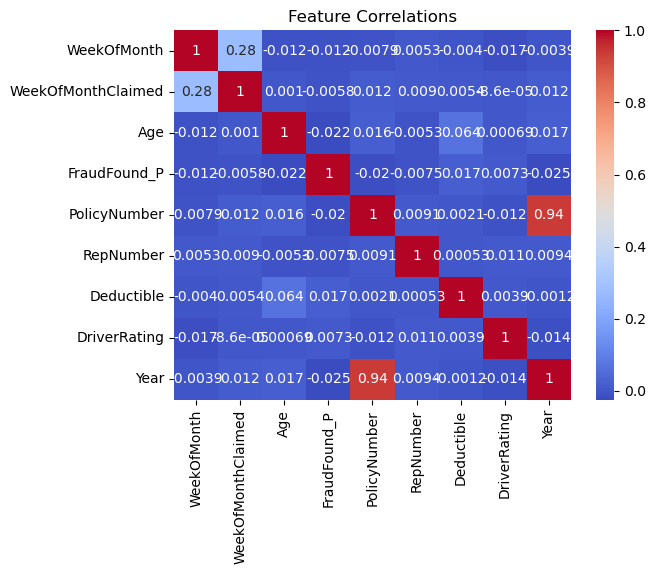

In [21]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

5.	Feature Relationships
-	Scatter plots for claim_amount vs age
-	Box plots for categorical features vs fraud

<Axes: xlabel='FraudFound_P', ylabel='Deductible'>

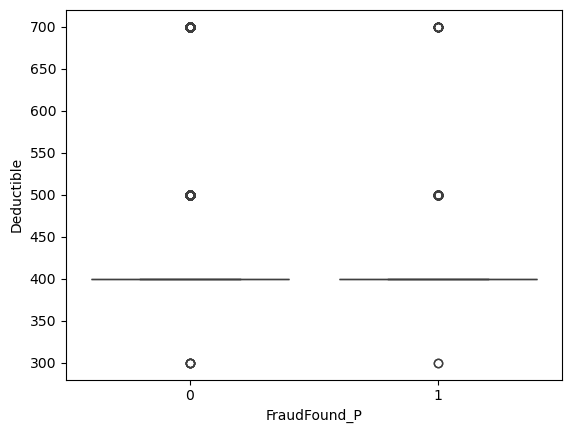

In [24]:
sns.boxplot(x='FraudFound_P', y='Deductible', data=df)

6.	Create EDA Report
-	Document findings in notebook
-	Note: Which features seem important?
-	Note: Any data quality issues?
-	Note: Class imbalance ratio


In [26]:
# Select the categorical columns identified as important
categorical_features = ['Fault', 'AgentType', 'AccidentArea', 'MaritalStatus']